<a href="https://colab.research.google.com/github/leonardoub/cmepda/blob/master/BRATS_nested_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
dataset_path = '/gdrive/My Drive/BRATS/data_without_NAN_without_HISTO_without_SPATIAL_with_histologies.csv'

In [0]:
df_data = pd.read_csv(dataset_path)

In [5]:
df_data

,ID,Date,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,VOLUME_NET_over_TC,VOLUME_ED_over_TC,VOLUME_ET_OVER_WT,VOLUME_NET_OVER_WT,VOLUME_ED_OVER_WT,VOLUME_TC_OVER_WT,VOLUME_ET_OVER_BRAIN,VOLUME_NET_OVER_BRAIN,VOLUME_ED_over_BRAIN,VOLUME_TC_over_BRAIN,VOLUME_WT_OVER_BRAIN,DIST_Vent_TC,DIST_Vent_ED,INTENSITY_Mean_ET_T1Gd,INTENSITY_STD_ET_T1Gd,INTENSITY_Mean_ET_T1,INTENSITY_STD_ET_T1,INTENSITY_Mean_ET_T2,INTENSITY_STD_ET_T2,INTENSITY_Mean_ET_FLAIR,INTENSITY_STD_ET_FLAIR,INTENSITY_Mean_NET_T1Gd,INTENSITY_STD_NET_T1Gd,INTENSITY_Mean_NET_T1,INTENSITY_STD_NET_T1,INTENSITY_Mean_NET_T2,INTENSITY_STD_NET_T2,INTENSITY_Mean_NET_FLAIR,...,TEXTURE_NGTDM_ED_T1_Busyness,TEXTURE_NGTDM_ED_T1_Complexity,TEXTURE_NGTDM_ED_T1_Strength,TEXTURE_NGTDM_ED_T2_Coarseness,TEXTURE_NGTDM_ED_T2_Contrast,TEXTURE_NGTDM_ED_T2_Busyness,TEXTURE_NGTDM_ED_T2_Complexity,TEXTURE_NGTDM_ED_T2_Strength,TEXTURE_NGTDM_ED_FLAIR_Coarseness,TEXTURE_NGTDM_ED_FLAIR_Contrast,TEXTURE_NGTDM_ED_FLAIR_Busyness,TEXTURE_NGTDM_ED_FLAIR_Complexity,TEXTURE_NGTDM_ED_FLAIR_Strength,TEXTURE_NGTDM_NET_T1Gd_Coarseness,TEXTURE_NGTDM_NET_T1Gd_Contrast,TEXTURE_NGTDM_NET_T1Gd_Busyness,TEXTURE_NGTDM_NET_T1Gd_Complexity,TEXTURE_NGTDM_NET_T1Gd_Strength,TEXTURE_NGTDM_NET_T1_Coarseness,TEXTURE_NGTDM_NET_T1_Contrast,TEXTURE_NGTDM_NET_T1_Busyness,TEXTURE_NGTDM_NET_T1_Complexity,TEXTURE_NGTDM_NET_T1_Strength,TEXTURE_NGTDM_NET_T2_Coarseness,TEXTURE_NGTDM_NET_T2_Contrast,TEXTURE_NGTDM_NET_T2_Busyness,TEXTURE_NGTDM_NET_T2_Complexity,TEXTURE_NGTDM_NET_T2_Strength,TEXTURE_NGTDM_NET_FLAIR_Coarseness,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Histology
0,TCGA-02-0006,1996.08.23,1662,384,36268,2046,38314,1469432,4.328125,0.045826,0.010588,0.812320,0.187680,17.726300,0.043378,0.010022,0.946599,0.053401,0.001131,0.000261,0.024682,0.001392,0.026074,31.5903,2.7735,149.7977,10.4671,194.1422,15.1037,154.9225,43.4709,220.5894,30.2917,137.8881,6.3820,183.6933,14.8846,161.1005,35.8591,227.7510,...,0.86315,1479.9762,1.10870,0.000605,0.40937,1.47070,2992.2698,0.71642,0.000690,0.28977,1.8815,1872.0528,0.75986,0.026040,0.37869,0.060929,1675.0041,14.11380,0.044156,0.41942,0.026740,2536.7559,43.31290,0.036634,0.50304,0.024264,3593.3279,43.67590,0.057204,0.33980,0.021897,2203.2034,61.32930,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.00000,GBM
1,TCGA-02-0009,1997.06.14,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.500750,0.499250,1.805000,0.178522,0.177990,0.643489,0.356511,0.003366,0.003356,0.012135,0.006723,0.018857,9.2443,3.0207,165.4345,6.4047,201.2400,13.4733,113.1601,10.1373,210.1810,15.9543,152.6013,4.2360,188.0607,11.1316,116.8538,10.0992,209.7901,...,0.40004,2378.9184,2.54730,0.000914,0.70926,0.78063,5719.2847,1.29980,0.000882,0.48919,1.8243,2954.8148,0.77199,0.002254,0.29324,1.223600,539.3057,0.53125,0.005712,0.20995,0.315580,967.7845,3.74440,0.003790,0.36163,0.271420,1996.1440,2.77050,0.004966,0.28715,0.189980,1440.4285,3.59990,3.31250,1.000000e-09,0.077618,0.122900,0.094336,91.47360,GBM
2,TCGA-02-0011,1998.02.01,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.061444,0.407290,0.592710,0.558400,0.261349,0.380334,0.358318,0.641682,0.023428,0.034094,0.032120,0.057521,0.089641,1.0000,1.0000,186.3385,17.6126,188.2019,23.5195,172.8969,32.7401,167.1395,34.1684,149.0643,12.9090,158.4197,15.2632,197.4966,27.1781,165.1014,...,1.51780,1750.3404,0.56482,0.000382,0.59301,1.81810,4990.3388,0.54747,0.000345,0.59184,2.4243,4703.9458,0.41937,0.000403,0.37863,1.957500,2509.3979,0.42842,0.000768,0.19849,1.395800,1322.6082,0.74730,0.000634,0.31856,1.144300,2517.8629,0.84294,0.000794,0.17961,1.068800,1147.5177,0.80480,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.42900,GBM
3,TCGA-02-0027,1999.03.28,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,

In [6]:
df_data.columns

Index(['ID', 'Date', 'VOLUME_ET', 'VOLUME_NET', 'VOLUME_ED', 'VOLUME_TC',
       'VOLUME_WT', 'VOLUME_BRAIN', 'VOLUME_ET_OVER_NET', 'VOLUME_ET_OVER_ED',
       ...
       'TEXTURE_NGTDM_NET_FLAIR_Busyness',
       'TEXTURE_NGTDM_NET_FLAIR_Complexity',
       'TEXTURE_NGTDM_NET_FLAIR_Strength', 'TGM_p1', 'TGM_dw', 'TGM_Cog_X_1',
       'TGM_Cog_Y_1', 'TGM_Cog_Z_1', 'TGM_T_1', 'Histology'],
      dtype='object', length=578)

In [0]:
data = df_data.drop(['Histology', 'ID', 'Date'], axis=1)

In [0]:
labels = df_data.Histology

#Random forest

In [9]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold

from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Vettorizzare i label
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

In [0]:
#Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scalers_to_test = [StandardScaler(), RobustScaler(), MinMaxScaler(), None]

In [0]:
# Designate distributions to sample hyperparameters from 
n_tree = [10, 50, 100, 150]
n_features_to_test = [0.9]
depth = [10, None]

In [0]:
# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [0]:
#RandomForestClassifier
steps = [('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=503))]
pipeline = Pipeline(steps)

parameteres = [{'scaler':[StandardScaler()], 
                'clf__n_estimators':list(n_tree), 'clf__criterion':['gini', 'entropy'], 
                'clf__max_depth':depth, 'clf__min_samples_split':[2, 5], 
                'clf__min_samples_leaf':[2, 4], 'clf__class_weight':[None, 'balanced']}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=inner_cv, n_jobs=-1, scoring='roc_auc', verbose=1)

In [0]:
# Nested CV with parameter optimization
nested_score = cross_val_score(grid, X=data, y=labels_encoded, cv=outer_cv)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In questo modo non riesco a sapere quali sono i best HP

In [0]:
nested_score

array([0.81176471, 0.90784314, 0.88865546])

questi dovrebbero essere i risultati del ciclo esterno di CV, ma con quali hp???

#ANOTHER WAY

In [0]:
train_index

NameError: ignored

In [0]:
from sklearn.metrics import roc_auc_score

In [17]:
dfObj.iloc[[2 ,0 ] , : ]


NameError: ignored

In [0]:
train_index

NameError: ignored

In [0]:
labels_encoded[train_index]

NameError: ignored

In [18]:
outer_loop_roc_auc_scores = []
outer_loop_accuracy_scores = []
inner_loop_won_params = []
inner_loop_roc_auc_scores = []
inner_loop_accuracy_scores = []
best_est_dict = {}
best_feat_dict = {}
i = 0

# Looping through the outer loop, feeding each training set into a GSCV as the inner loop
for train_index, test_index in outer_cv.split(data, labels_encoded):
    
    i+=1

    GSCV = GridSearchCV(pipeline, param_grid=parameteres, cv=inner_cv, n_jobs=-1, scoring=['roc_auc', 'accuracy'], refit='roc_auc', verbose=1)
    
    # GSCV is looping through the training data to find the best parameters. This is the inner loop
    GSCV.fit(data.iloc[train_index, :], labels_encoded[train_index])
    
    # The best hyper parameters from GSCV is now being tested on the unseen outer loop test data.
    pred = GSCV.predict(data.iloc[test_index, :])
    

    #per far uscire i best_estimators in qualche modo
    best_est_dict.update({f'best_est_{i}' : GSCV.best_estimator_})

    #The most important 10 features for the best estimator
    #features_list =  sorted(zip(rank_features, data.columns), reverse=True)[:10]
    #best_feat_dict.update({f'best_set_HP_{i}' : })


    # Appending the "winning" hyper parameters and their associated accuracy score
    inner_loop_won_params.append(GSCV.best_params_)
    
    outer_loop_roc_auc_scores.append(roc_auc_score(labels_encoded[test_index], pred))
    outer_loop_accuracy_scores.append(accuracy_score(labels_encoded[test_index], pred))

    inner_loop_roc_auc_scores.append(GSCV.best_score_)
    #inner_loop_accuracy_scores.append(GSCV.best_score_)

for i in zip(inner_loop_won_params, outer_loop_roc_auc_scores, inner_loop_roc_auc_scores):
    print(i)

#print('Mean of outer loop accuracy score:' np.mean(outer_loop_roc_auc_scores))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   46.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   45.1s finished


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   45.0s finished


({'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 50, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}, 0.8, 0.9494510320597277)
({'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 150, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}, 0.9, 0.9006660811008637)
({'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 150, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}, 0.8550420168067226, 0.9573122529644268)


In [19]:
inner_loop_roc_auc_scores

[0.9494510320597277, 0.9006660811008637, 0.9573122529644268]

In [20]:
outer_loop_accuracy_scores

[0.8775510204081632, 0.9387755102040817, 0.8541666666666666]

In [21]:
outer_loop_roc_auc_scores

[0.8, 0.9, 0.8550420168067226]

In [0]:
rank_features = GSCV.best_estimator_.named_steps["clf"].feature_importances_

In [23]:
rank_features

array([0.01414181, 0.00442697, 0.00161773, 0.00085371, 0.00091926,
       0.0020287 , 0.00905819, 0.00284512, 0.00414331, 0.01156362,
       0.02088045, 0.        , 0.01830897, 0.00258127, 0.0009319 ,
       0.        , 0.0091932 , 0.00111161, 0.00065254, 0.00069908,
       0.00045894, 0.00073061, 0.00191462, 0.00036889, 0.00132477,
       0.00052045, 0.00116913, 0.00147153, 0.00319024, 0.00260624,
       0.00312825, 0.        , 0.00033873, 0.00090147, 0.        ,
       0.        , 0.00268342, 0.00238228, 0.00030076, 0.        ,
       0.00501625, 0.        , 0.00038916, 0.0009644 , 0.0007241 ,
       0.00048085, 0.00190937, 0.        , 0.00086071, 0.00060549,
       0.00179221, 0.        , 0.00081886, 0.00266559, 0.00125548,
       0.00140828, 0.        , 0.        , 0.        , 0.00610427,
       0.00022161, 0.00980102, 0.00263838, 0.00214781, 0.0011957 ,
       0.        , 0.        , 0.00427285, 0.00072029, 0.        ,
       0.        , 0.        , 0.00014516, 0.00105318, 0.     

In [24]:
 sorted(zip(rank_features, data.columns), reverse=True)[:10]
 #ATTENZIONE HA SENSO SOLO SE NON SI FA PCA

[(0.020880451373372744, 'VOLUME_NET_over_TC'),
 (0.020345144047118215, 'TEXTURE_GLRLM_ET_FLAIR_RLV'),
 (0.019551125599257924, 'TEXTURE_NGTDM_ET_T2_Coarseness'),
 (0.019497380013951862, 'TEXTURE_GLRLM_ET_T2_LRHGE'),
 (0.019358349466383415, 'TEXTURE_GLSZM_ET_T2_ZSV'),
 (0.01830897495301974, 'VOLUME_ET_OVER_WT'),
 (0.01794858066316487, 'TEXTURE_NGTDM_ET_FLAIR_Busyness'),
 (0.016687958316660163, 'TEXTURE_GLSZM_ET_FLAIR_GLV'),
 (0.01648704612607801, 'TEXTURE_NGTDM_ET_T2_Strength'),
 (0.015629087119733754, 'TEXTURE_GLCM_ET_T2_AutoCorrelation')]

In [27]:
best_est_dict

{'best_est_1': Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('clf',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='entropy',
                                         max_depth=10, max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=2, min_samples_split=5,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=50, n_jobs=None,
                                         oob_score=False, random_state=503,
                                         verbose=0, warm_start=False))],
          verbose

In [0]:
best_est_1 = best_est_dict['best_est_1']
best_est_2 = best_est_dict['best_est_2']
best_est_3 = best_est_dict['best_est_3']

In [0]:
rank_feat_1 = best_est_1.named_steps["clf"].feature_importances_
rank_feat_2 = best_est_2.named_steps["clf"].feature_importances_
rank_feat_3 = best_est_3.named_steps["clf"].feature_importances_

In [30]:
 sorted(zip(rank_feat_1, data.columns), reverse=True)[:10]
 #ATTENZIONE HA SENSO SOLO SE NON SI FA PCA

[(0.05545908449902637, 'TEXTURE_GLSZM_ET_T1Gd_GLV'),
 (0.0259030738745922, 'TEXTURE_GLSZM_ET_T1Gd_ZP'),
 (0.024523086680276, 'VOLUME_ET'),
 (0.02435452291787448, 'VOLUME_ET_over_TC'),
 (0.024288759231805707, 'TEXTURE_GLRLM_ET_FLAIR_LRLGE'),
 (0.023537224467970262, 'VOLUME_NET_over_TC'),
 (0.02225654915689084, 'TEXTURE_GLSZM_ET_T1_GLV'),
 (0.021450935370269555, 'TEXTURE_GLCM_ET_T2_AutoCorrelation'),
 (0.021334939161023275, 'TEXTURE_GLRLM_ET_T2_SRHGE'),
 (0.021179159278858925, 'TEXTURE_NGTDM_ET_T2_Coarseness')]

In [31]:
 sorted(zip(rank_feat_2, data.columns), reverse=True)[:10]
 #ATTENZIONE HA SENSO SOLO SE NON SI FA PCA

[(0.03146400992470652, 'TEXTURE_NGTDM_ET_T2_Coarseness'),
 (0.0294446301800531, 'TEXTURE_GLRLM_ET_T1Gd_GLV'),
 (0.02431474644344582, 'TEXTURE_GLSZM_ET_T1Gd_GLV'),
 (0.02252327207594658, 'TEXTURE_NGTDM_NET_FLAIR_Coarseness'),
 (0.022224936935591674, 'TEXTURE_GLSZM_ET_T1Gd_ZP'),
 (0.021354980073060206, 'TEXTURE_GLSZM_ET_T2_ZSV'),
 (0.020064728397499055, 'TEXTURE_GLRLM_ET_FLAIR_GLV'),
 (0.019459898461311336, 'TEXTURE_GLSZM_ET_T1Gd_LZLGE'),
 (0.018935412432419967, 'VOLUME_NET_over_TC'),
 (0.01877666629286694, 'TEXTURE_NGTDM_ET_FLAIR_Busyness')]

In [32]:
 sorted(zip(rank_feat_3, data.columns), reverse=True)[:10]
 #ATTENZIONE HA SENSO SOLO SE NON SI FA PCA

[(0.020880451373372744, 'VOLUME_NET_over_TC'),
 (0.020345144047118215, 'TEXTURE_GLRLM_ET_FLAIR_RLV'),
 (0.019551125599257924, 'TEXTURE_NGTDM_ET_T2_Coarseness'),
 (0.019497380013951862, 'TEXTURE_GLRLM_ET_T2_LRHGE'),
 (0.019358349466383415, 'TEXTURE_GLSZM_ET_T2_ZSV'),
 (0.01830897495301974, 'VOLUME_ET_OVER_WT'),
 (0.01794858066316487, 'TEXTURE_NGTDM_ET_FLAIR_Busyness'),
 (0.016687958316660163, 'TEXTURE_GLSZM_ET_FLAIR_GLV'),
 (0.01648704612607801, 'TEXTURE_NGTDM_ET_T2_Strength'),
 (0.015629087119733754, 'TEXTURE_GLCM_ET_T2_AutoCorrelation')]

#SICCOME OTTENGO 3 SET DI BEST HP COME POSSO OTTENERE UN SOLO CLASSIFICATORE, PROVA MAJOR VOTING RULE TRA I 3 CLF, PER POI FARE CV E DARE STIMA PRESTAZIONI

##E' UNA CAZZATA PERCHE COMUNQUE DOVREI VALUTARE I DIVERSI CLF SUGLI STESSI PATTERN, INTRODUCO UN BIAS



In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
clf1 = best_est_1
clf2 = best_est_2
clf3 = best_est_3

eclf1 = VotingClassifier(estimators=[
        ('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='soft')
eclf1 = eclf1.fit(data, labels_encoded)



In [0]:
cross_val_score(eclf1, data, labels_encoded, scoring='accuracy', cv=5)

array([0.8       , 0.86206897, 0.93103448, 0.89655172, 0.89655172])

In [0]:
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))


#Prova ROC curve

In [0]:
data.iloc[train_index, :], labels_encoded[train_index]

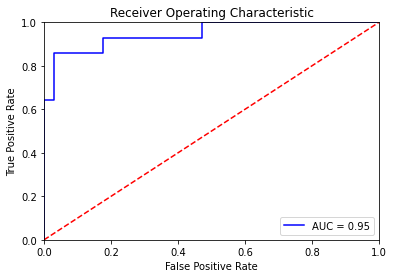

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best_est_3.predict_proba(data.iloc[test_index, :])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(labels_encoded[test_index], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:


df = pd.DataFrame()



for i in range(1, 6):

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(public_data, public_labels, test_size=0.3, 
    stratify=public_labels, random_state=i*500)

    #Vettorizzare i label
    train_labels_encoded = encoder.fit_transform(y_train)
    test_labels_encoded = encoder.transform(y_test)

    #RandomForestClassifier
    steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', RandomForestClassifier(random_state=i*503))]

    pipeline = Pipeline(steps)

    parameteres = [{'scaler':scalers_to_test, 'red_dim':[PCA(random_state=42)], 'red_dim__n_components':list(n_features_to_test),
                    'red_dim__whiten':[False, True], 
                    'clf__n_estimators':list(n_tree), 'clf__criterion':['gini', 'entropy'], 
                    'clf__max_depth':depth, 'clf__min_samples_split':[2, 5, 10], 
                    'clf__min_samples_leaf':[1, 2, 4], 'clf__class_weight':[None, 'balanced']}]

    grid = GridSearchCV(pipeline, param_grid=parameteres, cv=3, n_jobs=-1, verbose=1)



     grid.fit(X_train, y_train)

    score_train = grid.score(X_train, y_train)
    score_test = grid.score(X_test, y_test)
    best_p = grid.best_params_

    bp = pd.DataFrame(best_p, index=[i])
    bp['accuracy_train'] = score_train
    bp['accuracy_test'] = score_test
    bp['random_state'] = i*500
    bp['random_state_pca'] = i*42
    bp['random_state_clf'] = i*503

    df = df.append(bp, ignore_index=True)


NameError: ignored

In [0]:
i=1

In [0]:
D={i:0}

In [0]:
D

{1: 0}

In [0]:
GSCV.cv_results_

{'mean_fit_time': array([0.04292591, 0.15979902, 0.28904231, 0.42704121, 0.03603745,
        0.14704879, 0.29131174, 0.42921432, 0.03875256, 0.15052414,
        0.28611469, 0.4364055 , 0.03680285, 0.15737081, 0.28341047,
        0.41951609, 0.04110026, 0.14520152, 0.2877512 , 0.43643975,
        0.03826706, 0.1525561 , 0.28027264, 0.42455276, 0.03693469,
        0.14523554, 0.2879293 , 0.42229978, 0.03653971, 0.14446545,
        0.28954506, 0.42053429, 0.04056875, 0.16319013, 0.31778296,
        0.47783176, 0.04572646, 0.16461666, 0.31940985, 0.48252185,
        0.04021899, 0.16200439, 0.31158249, 0.46601915, 0.04007824,
        0.15897473, 0.30812319, 0.46444782, 0.04063058, 0.16757449,
        0.32255816, 0.48391596, 0.04173533, 0.16349562, 0.32099279,
        0.47366333, 0.04209916, 0.16413776, 0.30816483, 0.46665414,
        0.03943976, 0.1595428 , 0.33147613, 0.46747883, 0.03749824,
        0.14693483, 0.27852821, 0.4263742 , 0.03794654, 0.14843059,
        0.28074233, 0.42122142,

In [0]:
result = pd.DataFrame.from_dict(GSCV.cv_results_)

In [0]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__class_weight,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,param_scaler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.042926,0.006005,0.014029,0.002925,None,gini,10,2,2,10,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': None, 'clf__criterion': ...",0.928261,0.915217,0.947727,0.930402,0.013358,107,0.939394,0.909091,0.87500,0.907828,0.026304,1
1,0.159799,0.005339,0.028489,0.000624,None,gini,10,2,2,50,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': None, 'clf__criterion': ...",0.932609,0.923913,0.936364,0.930962,0.005215,103,0.848485,0.878788,0.87500,0.867424,0.013481,39
2,0.289042,0.008942,0.045308,0.001682,None,gini,10,2,2,100,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': None, 'clf__criterion': ...",0.952174,0.956522,0.945455,0.951383,0.004553,69,0.878788,0.848485,0.84375,0.857008,0.015522,69
3,0.427041,0.004191,0.066189,0.000580,None,gini,10,2,2,150,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': None, 'clf__criterion': ...",0.969565,0.960870,0.945455,0.958630,0.009970,31,0.878788,0.878788,0.87500,0.877525,0.001786,27
4,0.036037,0.000388,0.012232,0.000303,None,gini,10,2,5,10,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': None, 'clf__criterion': ...",0.928261,0.915217,0.954545,0.932675,0.016356,101,0.939394,0.909091,0.87500,0.907828,0.026304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.480948,0.008339,0.067990,0.003351,balanced,entropy,None,4,2,150,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': 'balanced', 'clf__criter...",0.947826,0.965217,0.959091,0.957378,0.007203,35,0.848485,0.909091,0.84375,0.867109,0.029749,57
124,0.040983,0.000613,0.012655,0.000081,balanced,entropy,None,4,5,10,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': 'balanced', 'clf__criter...",0.904348,0.930435,0.877273,0.904018,0.021705,115,0.818182,0.848485,0.78125,0.815972,0.027493,125
125,0.167810,0.005389,0.027517,0.001023,balanced,entropy,None,4,5,50,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': 'balanced', 'clf__criter...",0.926087,0.978261,0.950000,0.951449,0.021325,65,0.818182,0.848485,0.84375,0.836806,0.013310,105
126,0.315273,0.001824,0.046688,0.000346,balanced,entropy,None,4,5,100,"StandardScaler(copy=True, with_mean=True, with...","{'clf__class_weight': 'balanced', 'clf__criter...",0.952174,0.969565,0.954545,0.958762,0.007700,23,0.848485,0.848485,0.87500,0.857323,0.012499,61
